# Initialization

## Data Preparation

In [1]:
import os
import shutil
import pathlib

In [ ]:
"""
!cd data
!unzip dogs-vs-cats.zip
!unzip train.zip
"""

In [2]:
data_path = os.path.join(os.getcwd(), 'data/train/')
data_path_cat = data_path + 'cat/'
data_path_dog = data_path + 'dog/'
os.makedirs(data_path_cat, exist_ok=True)
os.makedirs(data_path_dog, exist_ok=True)

In [3]:
for filename in os.listdir('data/train/'):
    if filename.find('cat.') != -1:
        shutil.move(data_path + filename, data_path_cat)
    elif filename.find('dog.') != -1:
        shutil.move(data_path + filename, data_path_dog)

Only use 4000 images of cat and 4000 images of dog in total due to memory constraint.

In [ ]:
# Delete some data from the dataset
"""
!cd data/train/cat
!find . -type f -print0 | sort -zR | tail -zn +4001 | xargs -0 rm
!cd ../dog
!find . -type f -print0 | sort -zR | tail -zn +4001 | xargs -0 r
"""

## Data Loading and Pre-processing

In [4]:
import numpy as np
import PIL
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2023-07-14 10:35:41.853735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


Calculate number of samples in the dataset

In [6]:
data_path = pathlib.Path(data_path).with_suffix('')
images_count = len(list(data_path.glob('*/*.jpg')))
print(images_count)

8000


# Dataset Initialization

In [7]:
batch_size = 20
img_height = 200
img_width = 200

Split dataset into 3 parts:
- Test dataset
- Train dataset
- Valid dataset

In [8]:
train_dataset, test_dataset = keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='both',
    seed=84,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Using 1600 files for validation.


2023-07-14 10:37:05.538401: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
class_names = train_dataset.class_names
print(class_names)

['cat', 'dog']


In [10]:
valid_dataset = train_dataset.take(round(train_dataset.cardinality().numpy() * 0.2))
train_dataset = train_dataset.skip(round(train_dataset.cardinality().numpy() * 0.2)) 

In [11]:
print("Test dataset batches:", test_dataset.cardinality())
print("Train dataset batches:", train_dataset.cardinality())
print("Valid dataset batches:", valid_dataset.cardinality())

Test dataset batches: tf.Tensor(80, shape=(), dtype=int64)
Train dataset batches: tf.Tensor(256, shape=(), dtype=int64)
Valid dataset batches: tf.Tensor(64, shape=(), dtype=int64)


### Output Encoding

From string outputs 'cat' and 'dog' to 0 and 1

## Data Visualization

2023-07-12 19:46:54.642909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6400]
	 [[{{node Placeholder/_4}}]]
2023-07-12 19:46:54.644680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6400]
	 [[{{node Placeholder/_0}}]]


2023-07-12 19:46:58.975255: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-07-12 19:46:58.975959: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


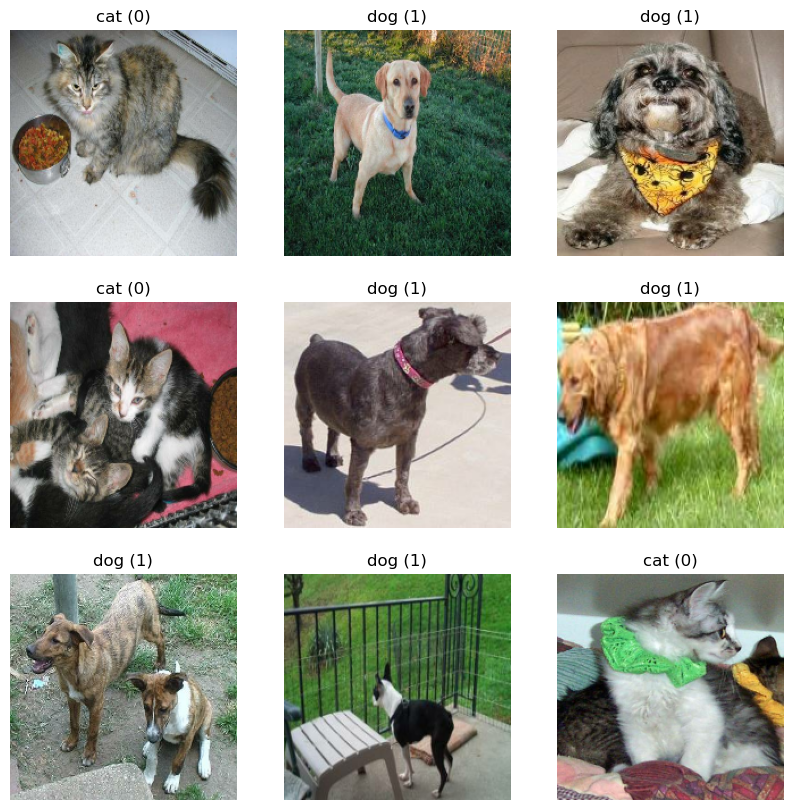

In [26]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('{} ({})'.format(class_names[labels[i]], str(labels[i].numpy())))
        plt.axis("off")

In [27]:
for img_batch, labels_batch in train_dataset:
    print(img_batch.shape)
    print(labels_batch.shape)
    break

2023-07-12 19:47:06.538039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6400]
	 [[{{node Placeholder/_4}}]]
2023-07-12 19:47:06.540215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6400]
	 [[{{node Placeholder/_0}}]]


(20, 200, 200, 3)
(20,)


2023-07-12 19:47:11.086550: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-07-12 19:47:11.086687: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Dataset Configuration

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.  
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# NN Model

## Model Initialization

In [13]:
LR=0.0002

### Model 1

In [12]:
model_1 = keras.Sequential([
    keras.layers.InputLayer(input_shape=[200, 200, 3]),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(
        filters=6,
        kernel_size=5,
        activation='relu'
    ), # 196 196, 6
    keras.layers.MaxPooling2D(), # 98, 98, 6
    keras.layers.Conv2D( 
        filters=18,
        kernel_size=3,
        activation='relu'
    ), # 96, 96, 18
    keras.layers.MaxPooling2D(), # 48, 48, 18
    keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu'
    ), # 46, 46, 10
    keras.layers.MaxPooling2D(), # 23, 23, 10
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 196, 196, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 18)        990       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 18)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 10)        1

In [37]:
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [43]:
model_1.save_weights('model_1_final.h5')

In [16]:
model_1.load_weights('model_1_init.h5')

In [17]:
m1_init_w = model_1.get_weights()

### Model 2

In [14]:
model_2 = keras.Sequential([
    keras.layers.InputLayer(input_shape=[200, 200, 3]),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(
        filters=6,
        kernel_size=5,
        activation='relu'
    ), # 196 196, 6
    keras.layers.MaxPooling2D(), # 98, 98, 6
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 
        filters=18,
        kernel_size=3,
        activation='relu'
    ), # 96, 96, 18
    keras.layers.MaxPooling2D(), # 48, 48, 18
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu'
    ), # 46, 46, 10
    keras.layers.MaxPooling2D(), # 23, 23, 10
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [15]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 196, 196, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 6)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 6)        24        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 18)        990       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 18)       0

In [16]:
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model_2.save_weights('model_2_final.h5')

In [50]:
model_2.save_weights('model_2_init.h5')

In [17]:
model_2.load_weights('model_2_init.h5')

In [18]:
m2_init_w = model_2.get_weights()

## Model Training

In [19]:
history = model_2.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=5
)

Epoch 1/5


2023-07-14 10:38:09.447407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6400]
	 [[{{node Placeholder/_4}}]]
2023-07-14 10:38:09.448868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6400]
	 [[{{node Placeholder/_0}}]]


256/256 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.5910

2023-07-14 10:40:21.738670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6400]
	 [[{{node Placeholder/_4}}]]
2023-07-14 10:40:21.745806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6400]
	 [[{{node Placeholder/_0}}]]


256/256 [==============================] - 153s 550ms/step - loss: 0.6784 - accuracy: 0.5910 - val_loss: 0.6654 - val_accuracy: 0.5813
Epoch 2/5
256/256 [==============================] - 84s 325ms/step - loss: 0.6133 - accuracy: 0.6514 - val_loss: 0.5753 - val_accuracy: 0.7086
Epoch 3/5
256/256 [==============================] - 97s 376ms/step - loss: 0.5632 - accuracy: 0.7088 - val_loss: 0.5454 - val_accuracy: 0.7234
Epoch 4/5
256/256 [==============================] - 90s 351ms/step - loss: 0.5168 - accuracy: 0.7428 - val_loss: 0.5279 - val_accuracy: 0.7422
Epoch 5/5
256/256 [==============================] - 83s 324ms/step - loss: 0.4776 - accuracy: 0.7643 - val_loss: 0.5137 - val_accuracy: 0.7461


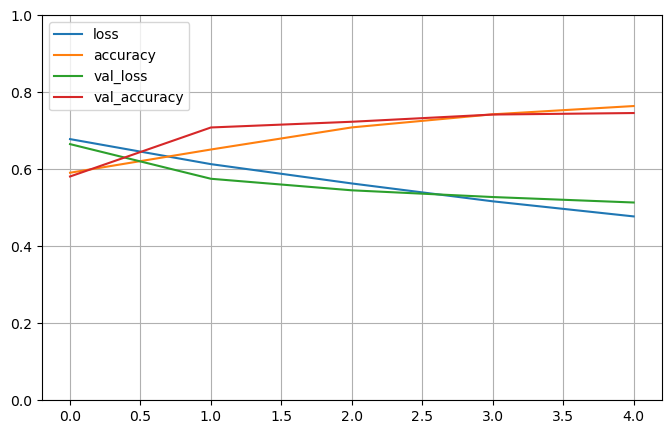

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.show()

In [21]:
result = model_2.evaluate(test_dataset, return_dict=True)
result

2023-07-14 10:49:07.456418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]
2023-07-14 10:49:07.458021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]


80/80 [==============================] - 14s 171ms/step - loss: 0.5511 - accuracy: 0.7188


{'loss': 0.5511153340339661, 'accuracy': 0.71875}

In [57]:
f = open('result.txt', 'a')
f.write('Name: {}\n\tOptimizer: {}\n\tLearning rate: {}\n\t{}\n\n'.format('model_2', 'Adam', LR, result))
f.close()

In [68]:
model_2.set_weights(m2_init_w)